In [1]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/Users/brianchen/Desktop/Detector/Training


In [3]:
# Pip install (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

Ultralytics YOLOv8.0.5 🚀 Python-3.8.13 torch-1.13.1 CPU
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 197.2/228.3 GB disk)


In [4]:
# Git clone

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e ultralytics

# from IPython import display
# display.clear_output()
# !yolo mode=checks

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml    epochs=1 ...
            ...           ...           ...
          segment        predict        yolov8n-seg.pt
          classify        val           yolov8n-cls.pt
```

## Inference with Pre-trained COCO Model

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 104k/104k [00:00<00:00, 31.6MB/s]
Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
100% 6.24M/6.24M [00:03<00:00, 2.08MB/s]

Fusing layers... 
YOLOv8n summary: 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 14.8ms
Speed: 0.5ms pre-process, 14.8ms inference, 17.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


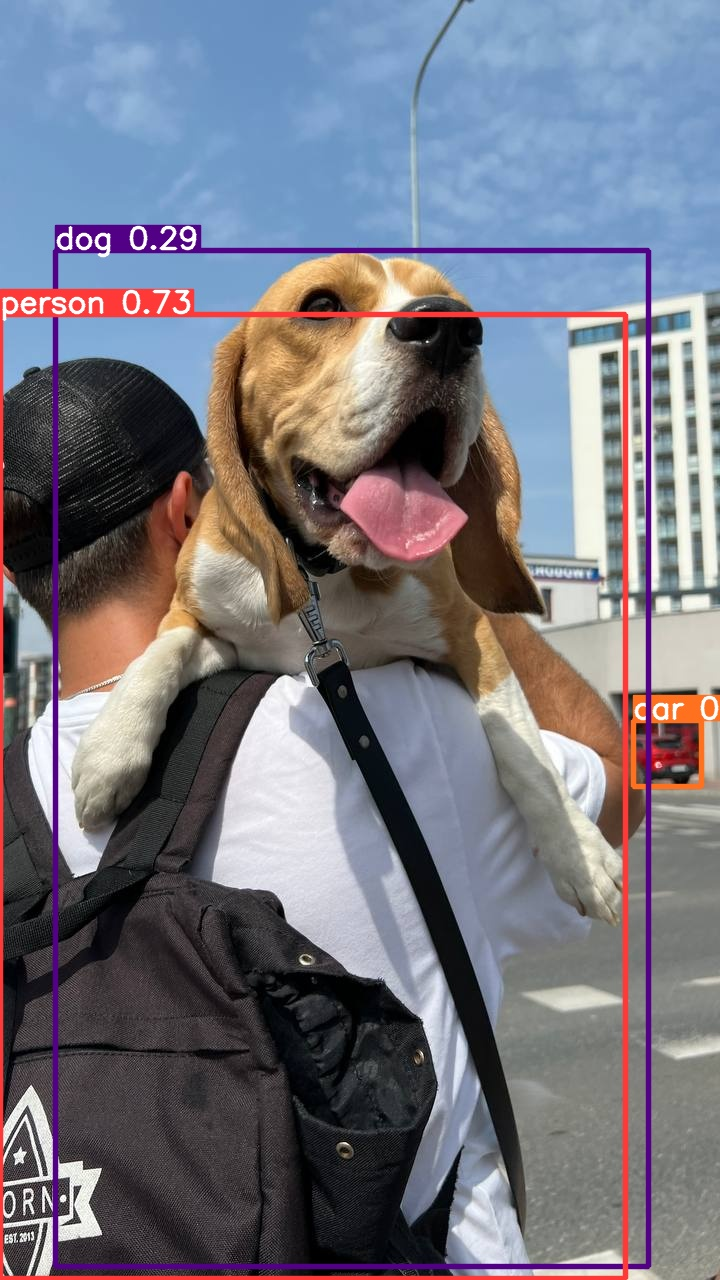

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

In [6]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
Ultralytics YOLOv8.0.5 🚀 Python-3.8.13 torch-1.13.1 CPU
Fusing layers... 
YOLOv8n summary: 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
image 1/1 /Users/brianchen/Desktop/Detector/Training/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 416.9ms
Speed: 2.4ms pre-process, 416.9ms inference, 32.7ms postprocess per image at shape (1, 3, 640, 640)


In [7]:
 %cd {HOME}

!pip3 install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3YdndOdZYWe4d2pJ14sQ")
project = rf.workspace("smhs-frc-1160").project("chargedup23")
dataset = project.version(1).download("yolov8")

/Users/brianchen/Desktop/Detector/Training
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to ChargedUp23-1 in yolov8:: 100%|██████████| 1008/1008 [00:00<00:00, 5444.05it/s]


## Custom Training

In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800

/Users/brianchen/Desktop/Detector/Training
Ultralytics YOLOv8.0.5 🚀 Python-3.8.13 torch-1.13.1 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/brianchen/Desktop/Detector/Training/ChargedUp23-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fa

In [9]:
!ls {HOME}/runs/detect/train/

ls: cannot access '/content/runs/detect/train/': No such file or directory


/content


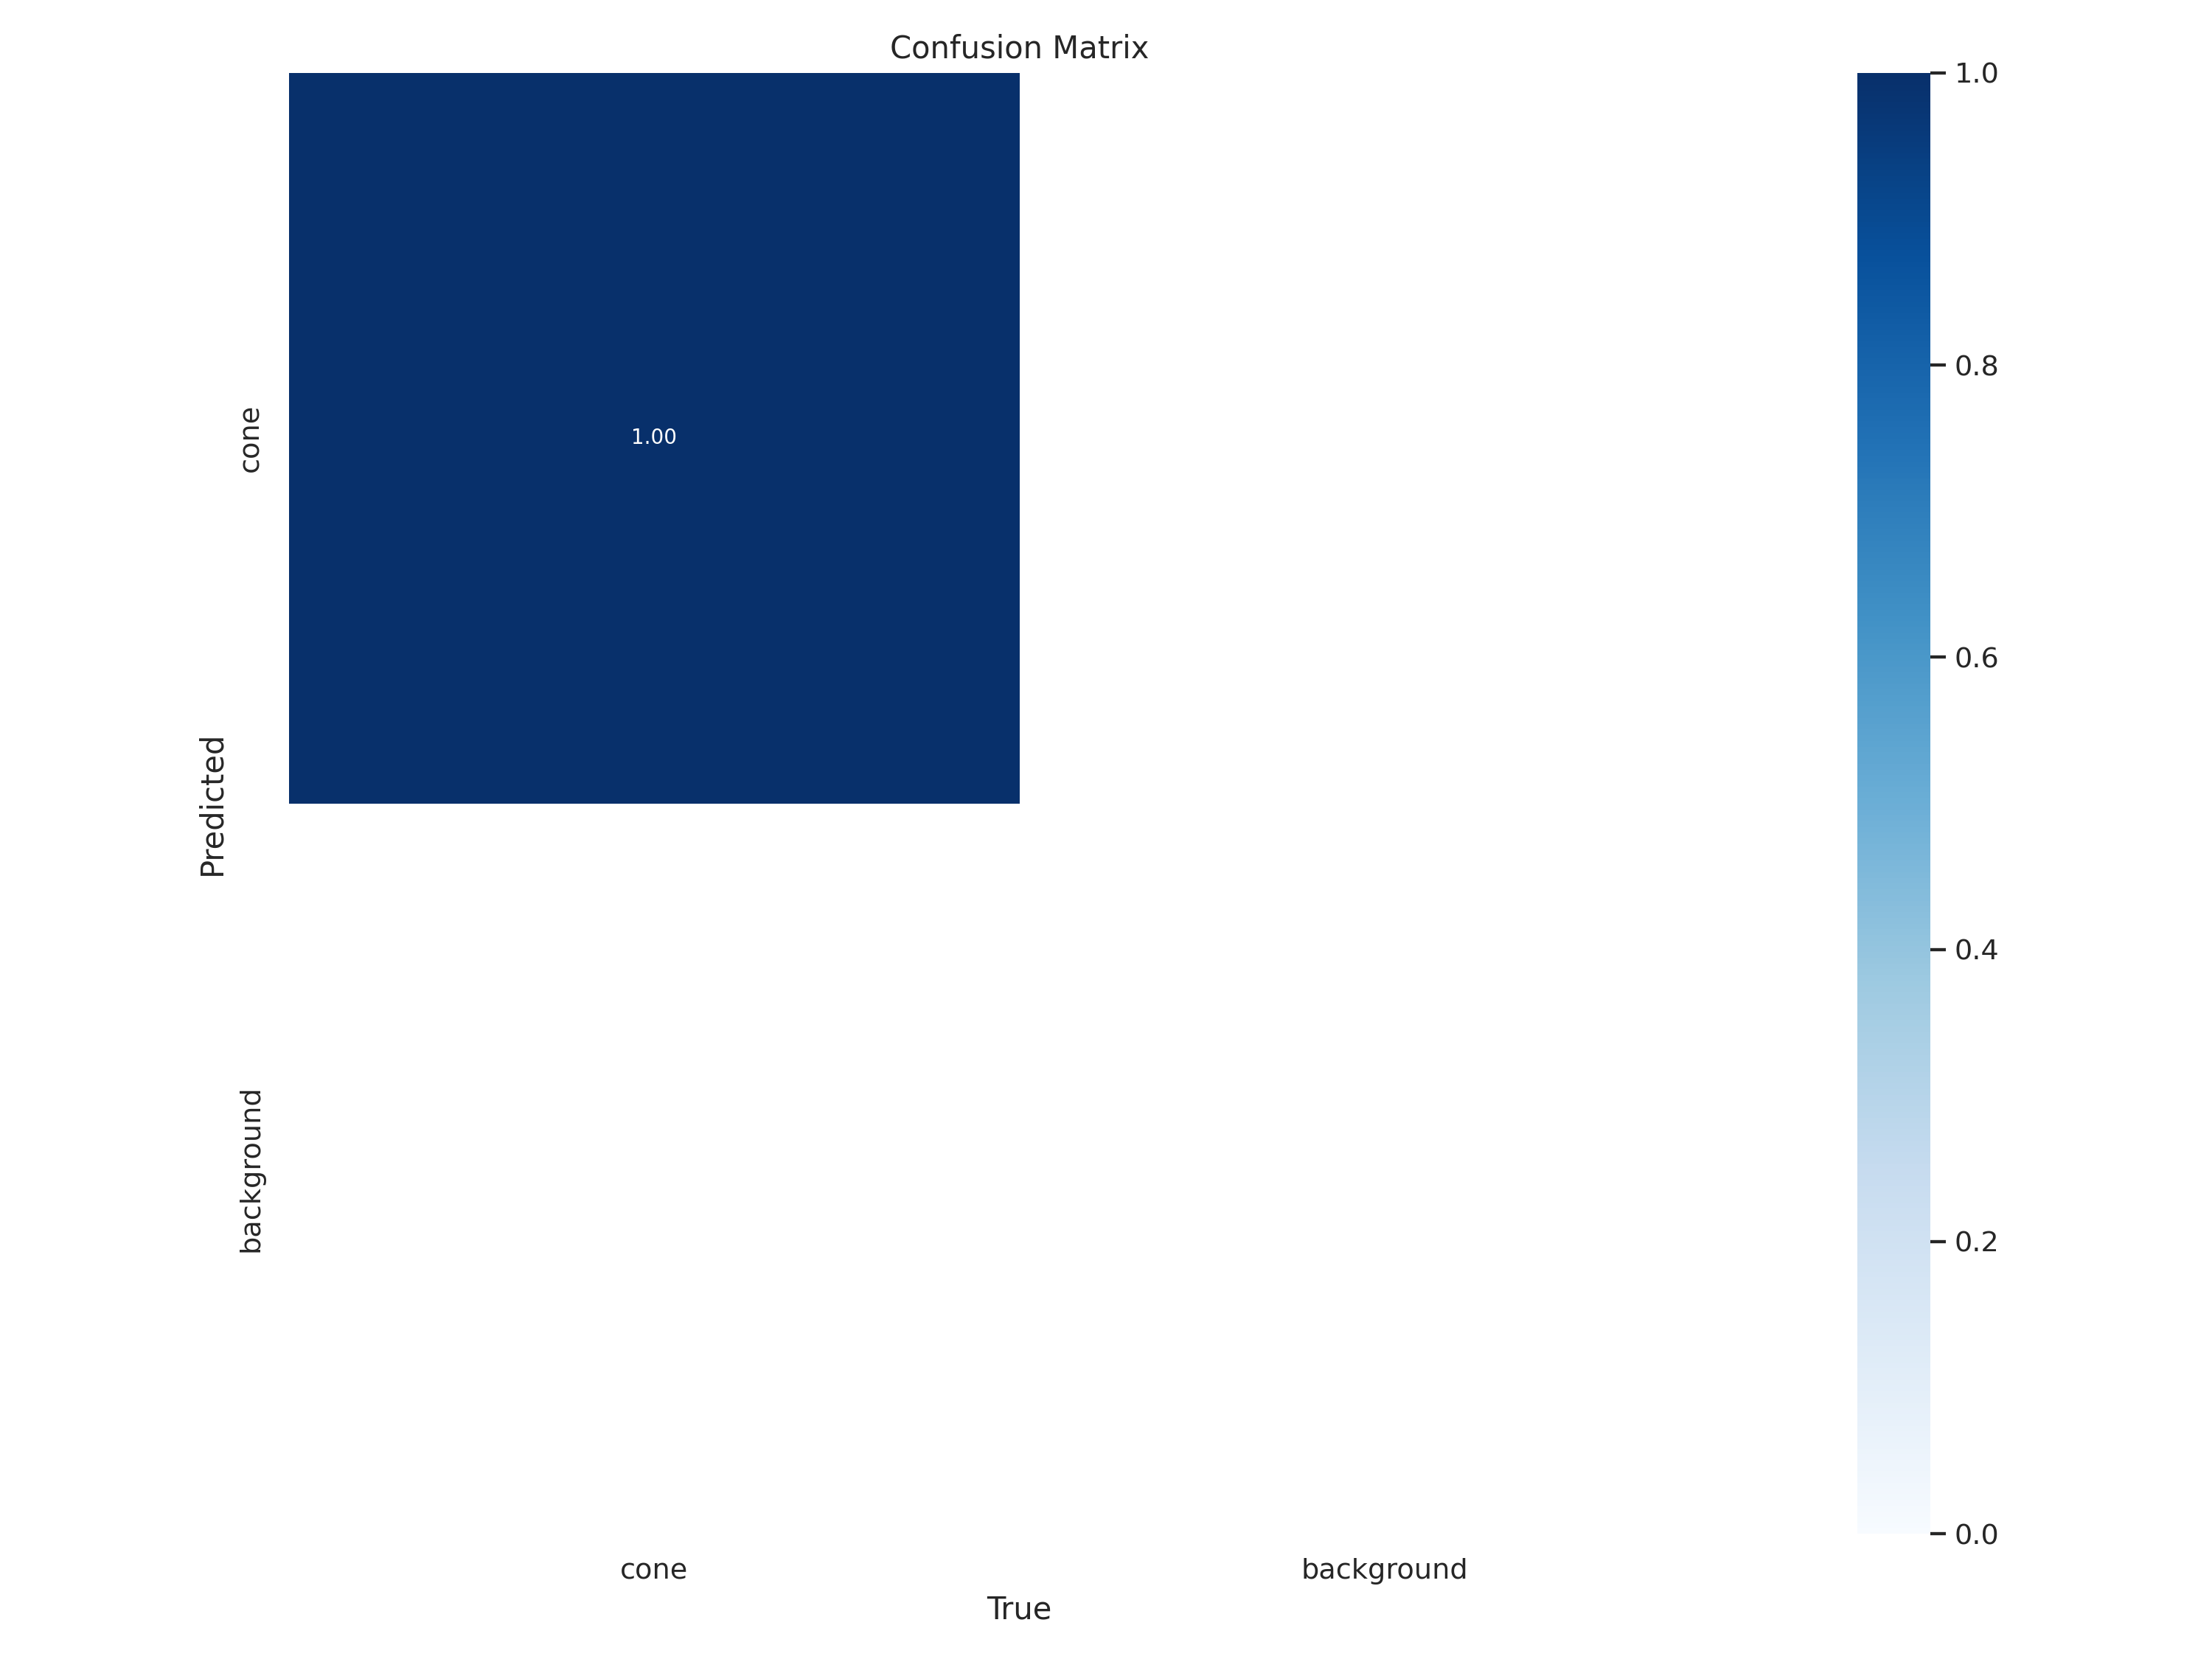

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


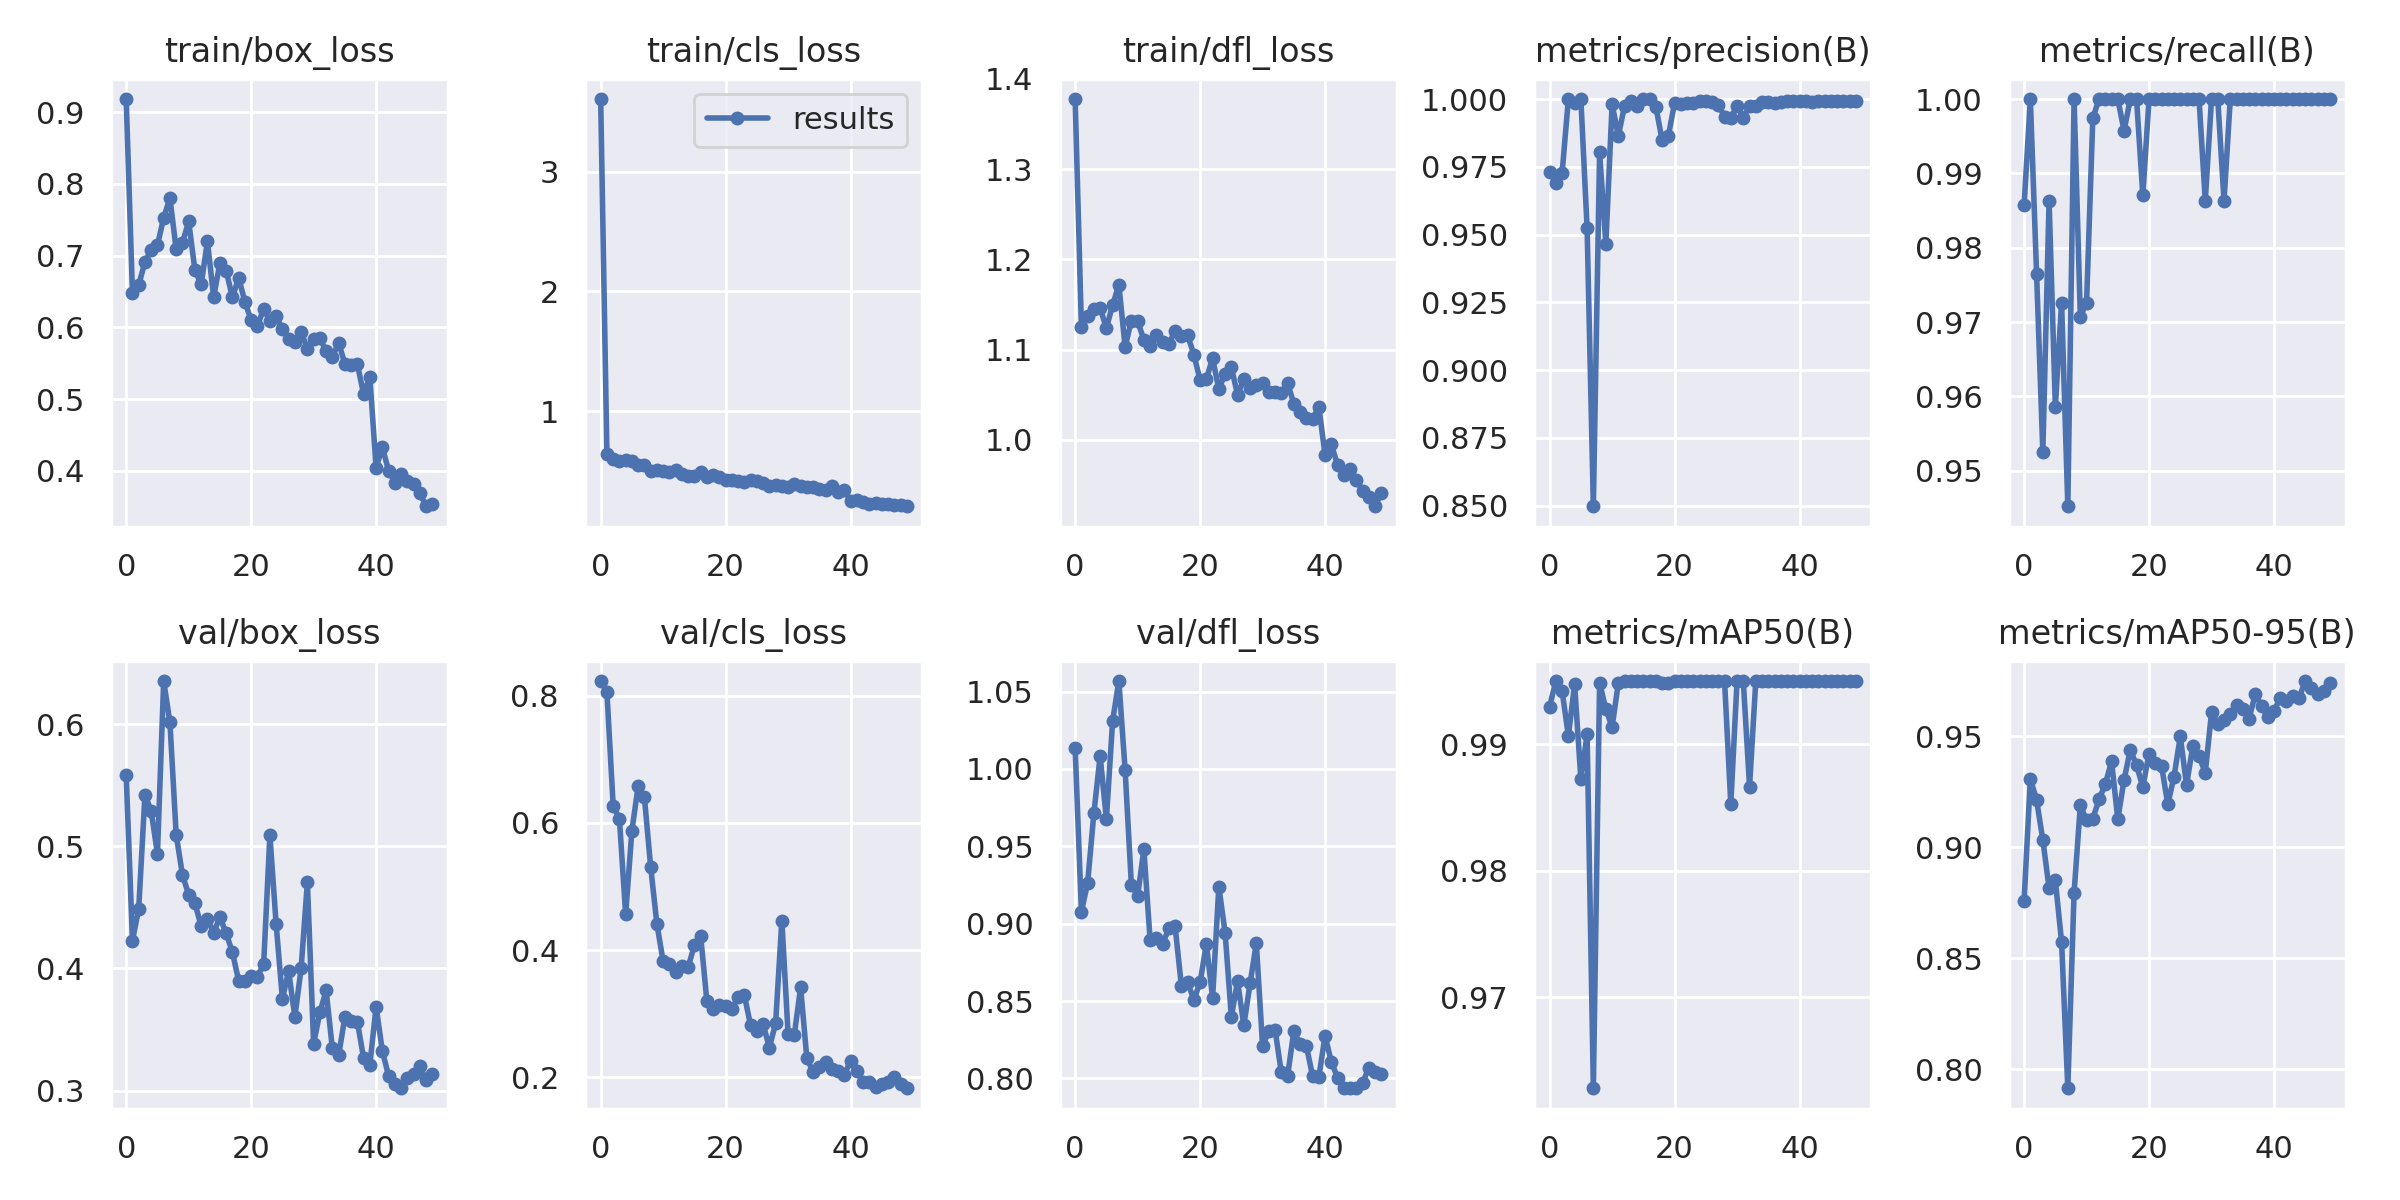

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


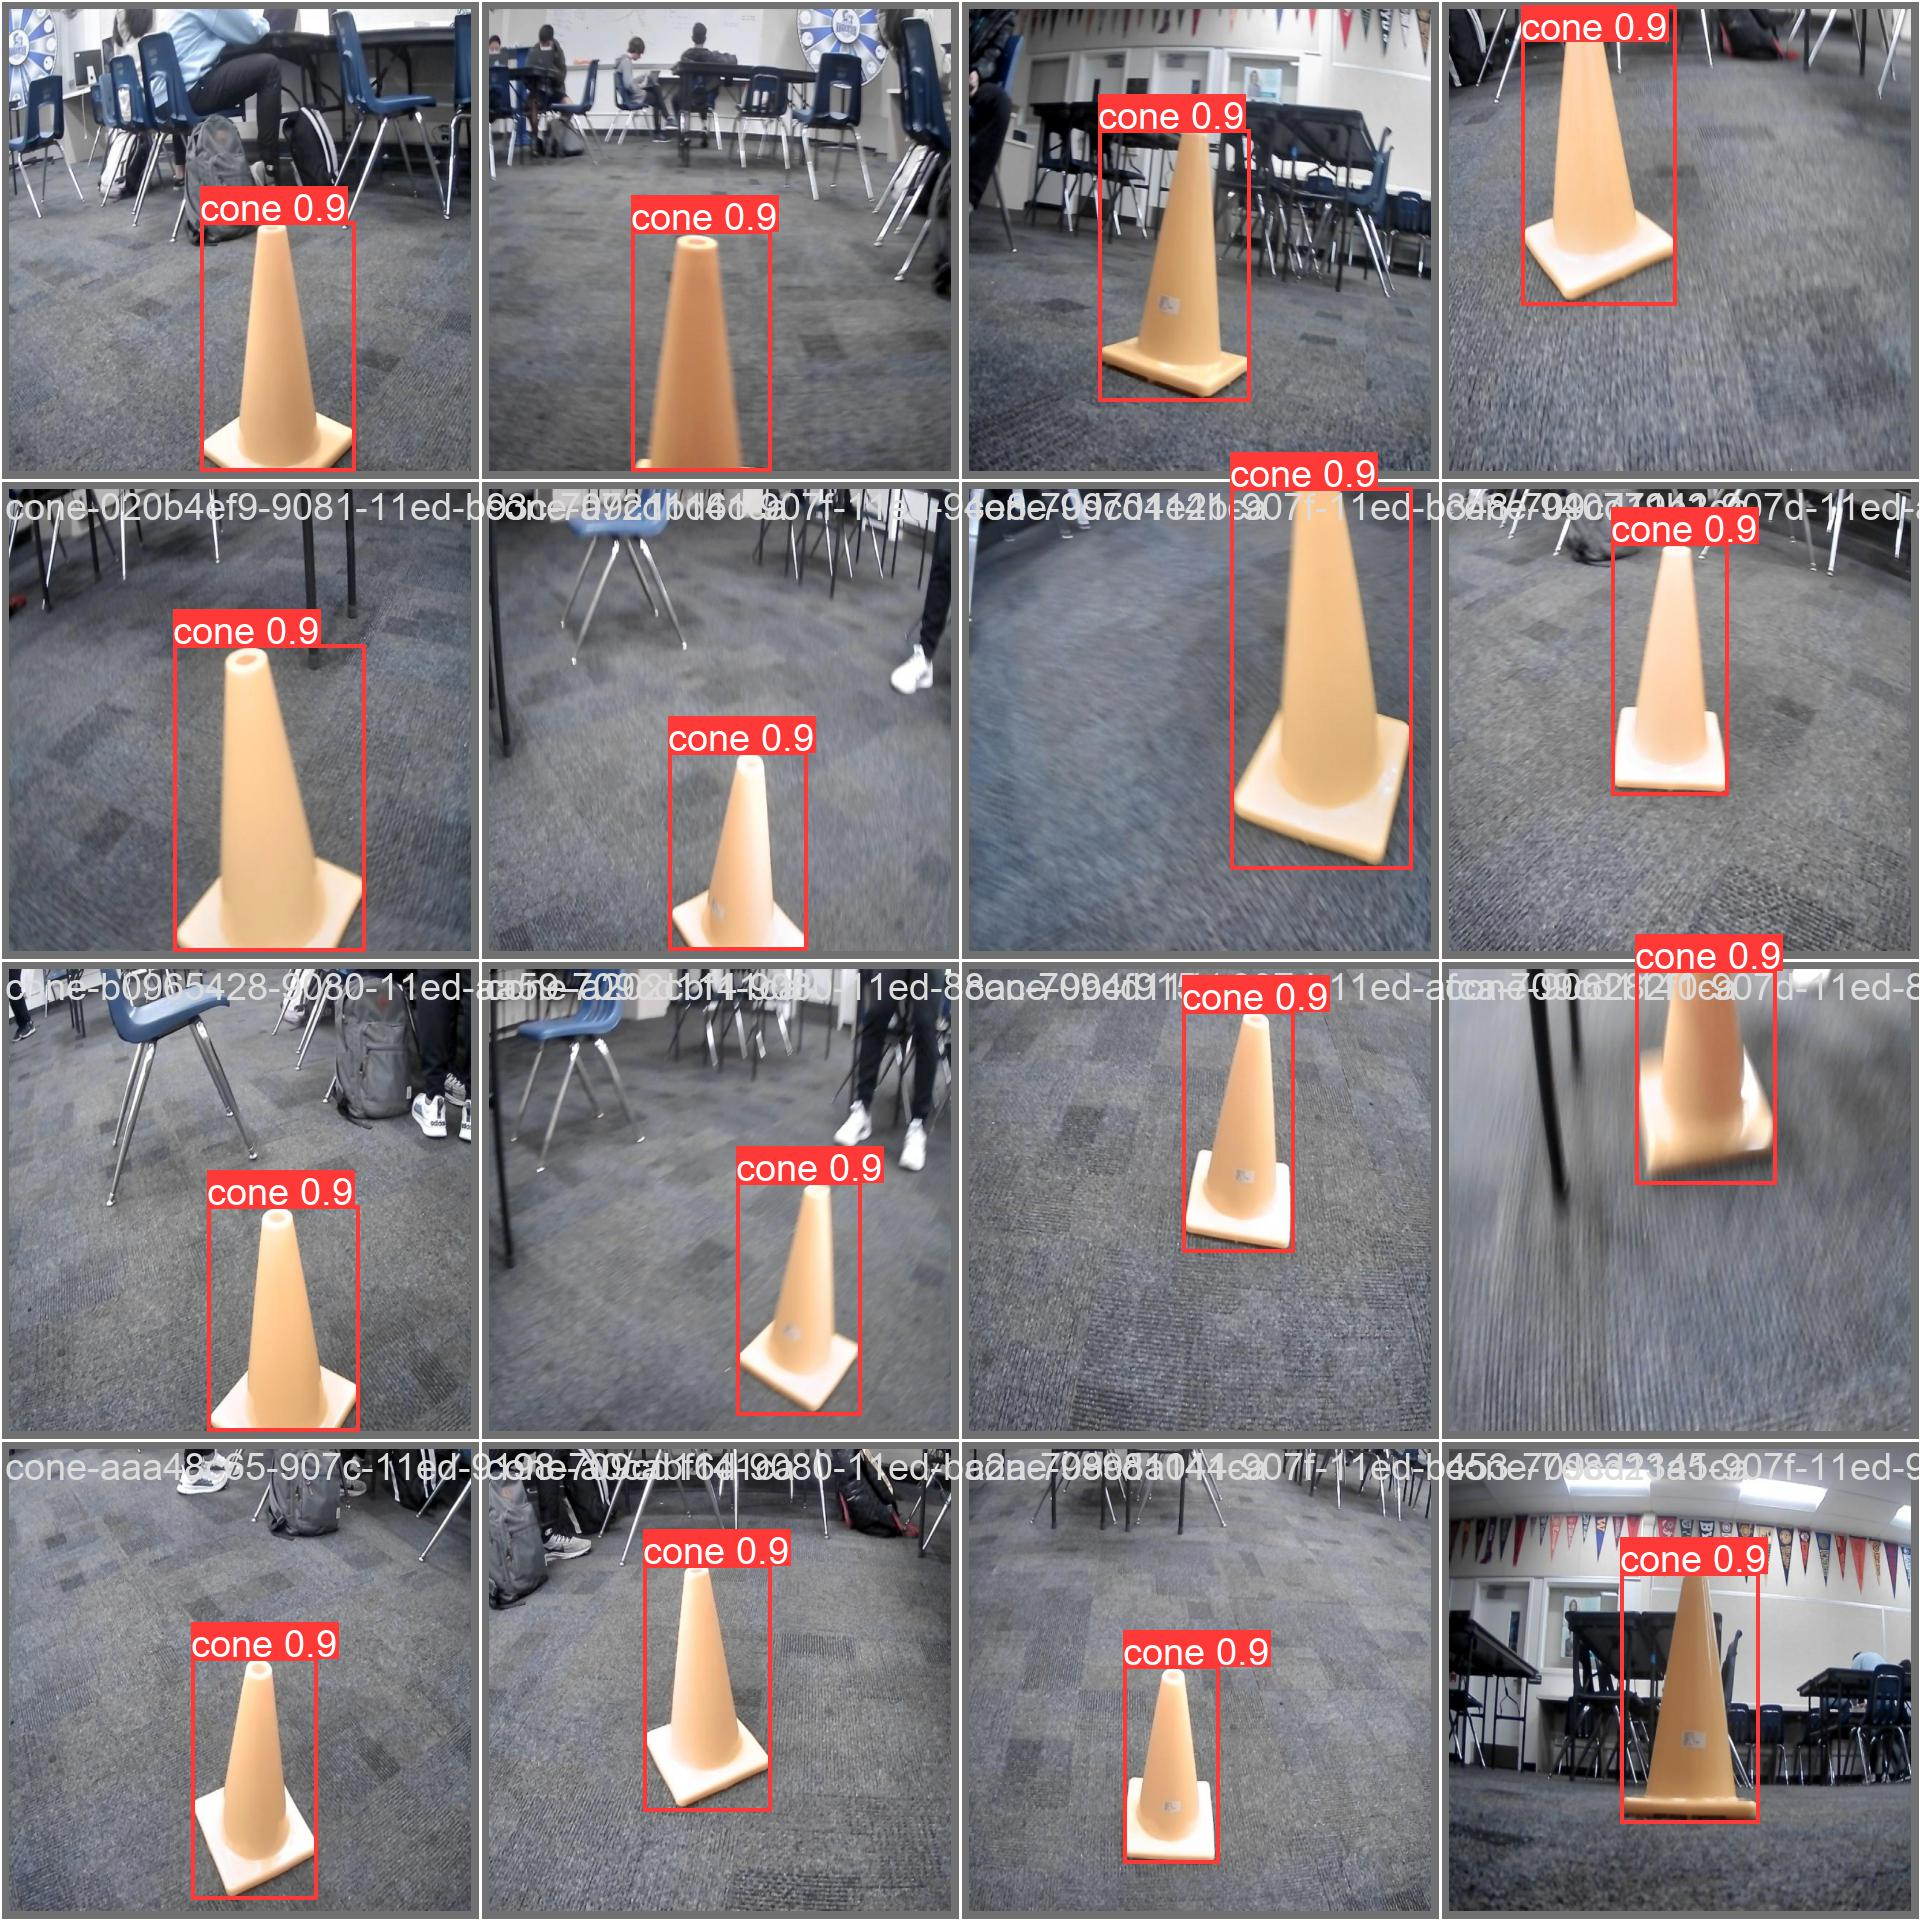

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [16]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/ChargedUp23-1/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100% 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:03<00:00,  1.64it/s]
                   all         73         73      0.999          1      0.995      0.972
Speed: 2.7ms pre-process, 13.4ms inference, 0.0ms loss, 2.6ms post-process per image


## Inference with Custom Model

> Indented block



In [18]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/53 /content/ChargedUp23-1/test/images/cone-0281681c-9080-11ed-8845-709cd1141cab_jpg.rf.aba1f8edd51aa6a4bbc7ec0a25a215a8.jpg: 640x640 1 cone, 17.1ms
image 2/53 /content/ChargedUp23-1/test/images/cone-06226f48-907f-11ed-a12f-709cd1141cab_jpg.rf.1e7118c2ca8d82615835fafcb2fc3ee0.jpg: 640x640 1 cone, 17.1ms
image 3/53 /content/ChargedUp23-1/test/images/cone-0affa018-9080-11ed-a834-709cd1141cab_jpg.rf.0a113aa1bd9f8f5f630a777989b573a1.jpg: 640x640 1 cone, 17.1ms
image 4/53 /content/ChargedUp23-1/test/images/cone-0c4bfaf5-907e-11ed-a9f5-709cd1141cab_jpg.rf.c85b1e7520a21a50724a355acaac1bf6.jpg: 640x640 1 cone, 17.1ms
image 5/53 /content/ChargedUp23-1/test/images/cone-13799e6a-9080-11ed-98f7-709cd1141cab_jpg.rf.86497e9ab96f01deb369fc9475c3a104.jpg: 640x640 1 cone, 17.1ms
image 6/53 /content/ChargedUp23-1/

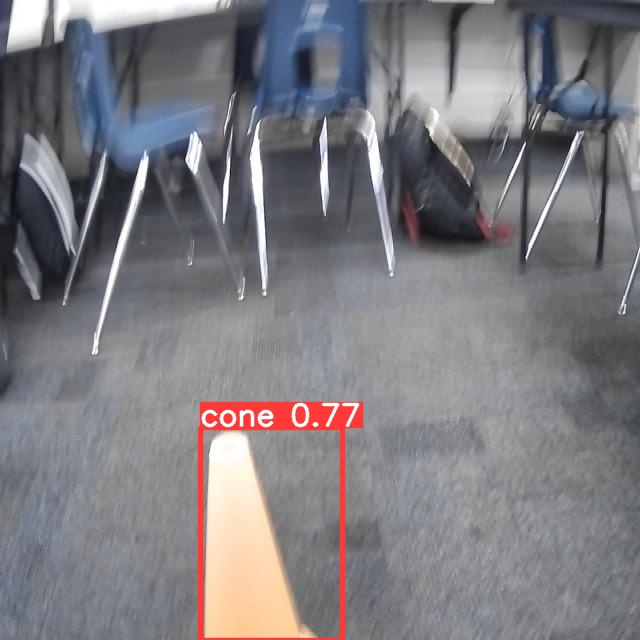

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1


In [20]:
# DOWNLOAD THE MODEL

from google.colab import files
files.download("/content/runs/detect/train2")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>